In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
# Define the input shape
input_img = Input(shape=(28, 28))  # Changed input shape to (28, 28)

# Add a Flatten layer to reshape the input
flattened_input = Flatten()(input_img) # Flatten the input

# Encoder layers
encoded1 = Dense(256, activation='relu')(flattened_input) # Connect to flattened input
encoded2 = Dense(128, activation='relu')(encoded1)
encoded3 = Dense(32, activation='relu')(encoded2)

# Decoder layers
decoded1 = Dense(32, activation='relu')(encoded3)
decoded2 = Dense(128, activation='relu')(decoded1)
decoded3 = Dense(784, activation='sigmoid')(decoded2)

# Reshape the output to (28, 28)
reshaped_output = keras.layers.Reshape((28, 28))(decoded3)

In [5]:
# Define the autoencoder model
autoencoder = Model(input_img, reshaped_output)

# Define the encoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
# Reshape x_train and x_test before fitting
x_train_reshaped = x_train.reshape(-1, 28, 28) # Reshape x_train
x_test_reshaped = x_test.reshape(-1, 28, 28)  # Reshape x_test


# Fit Auto Encoder
autoencoder.fit(x_train_reshaped, x_train_reshaped, epochs=15, batch_size=64, shuffle=True, validation_data=(x_test_reshaped, x_test_reshaped))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.2334 - val_loss: 0.1283
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1249 - val_loss: 0.1141
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1132 - val_loss: 0.1069
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1072 - val_loss: 0.1028
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1034 - val_loss: 0.0993
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1000 - val_loss: 0.0979
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0976 - val_loss: 0.0959
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0965 - val_loss: 0.0950
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0952 - val_loss: 0.0941
Epoch 10/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0938 - val_loss: 0.0928
Epoch 11/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0930 - val_loss: 0.0919
Epoch 12/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/st

In [7]:
# show output of autoencoder
decoded_imgs = autoencoder.predict(x_test_reshaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


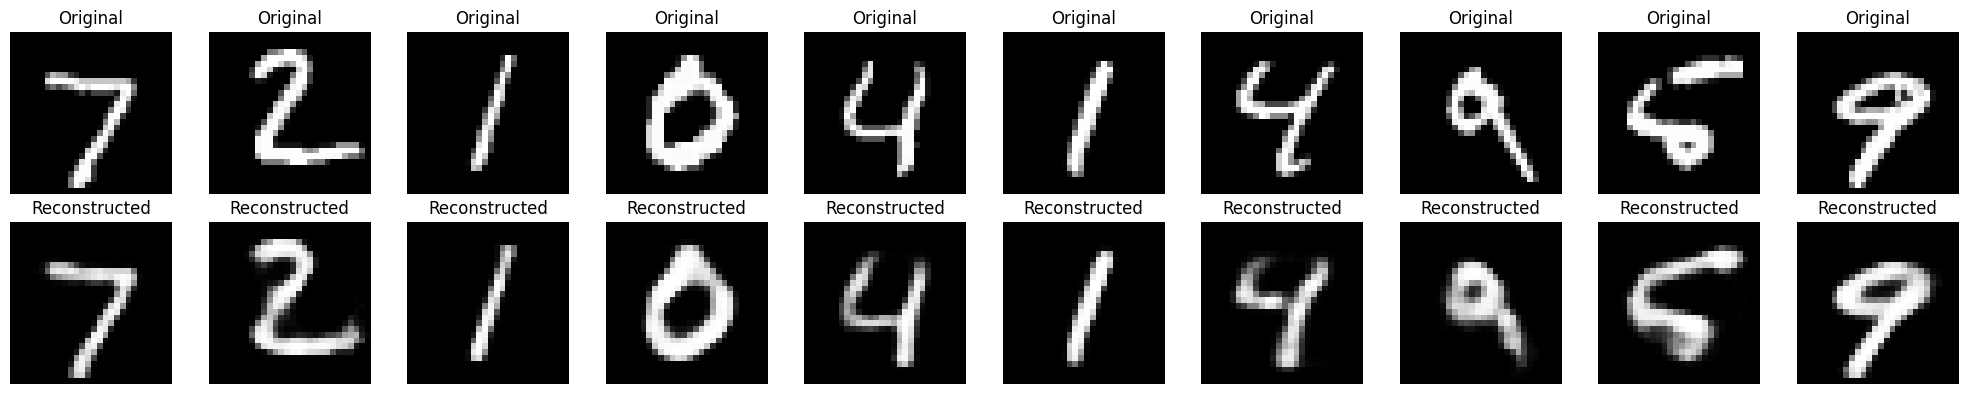

In [8]:
import matplotlib.pyplot as plt

# Plotting the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_reshaped[i].reshape(28, 28))  # Adjust dimensions if needed
    plt.gray()
    ax.set_title("Original")
    ax.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # Adjust dimensions if needed
    plt.gray()
    ax.set_title("Reconstructed")
    ax.axis('off')

plt.tight_layout()
plt.show()
